# Comparative Artist Color Analysis

## Learning Objectives
- Compare color usage across multiple artists
- Quantitatively distinguish artistic movements
- Calculate color diversity metrics
- Create comprehensive color reports

## 1. Setup

In [1]:
from renoir import ArtistAnalyzer
from renoir.color import ColorExtractor, ColorAnalyzer, ColorVisualizer

analyzer = ArtistAnalyzer()
extractor = ColorExtractor()
color_analyzer = ColorAnalyzer()
visualizer = ColorVisualizer()

## 2. Compare Two Artists

Loading WikiArt dataset...


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

✓ Loaded 81444 artworks
✓ Found 5 works by claude-monet
✓ Found 5 works by vincent-van-gogh


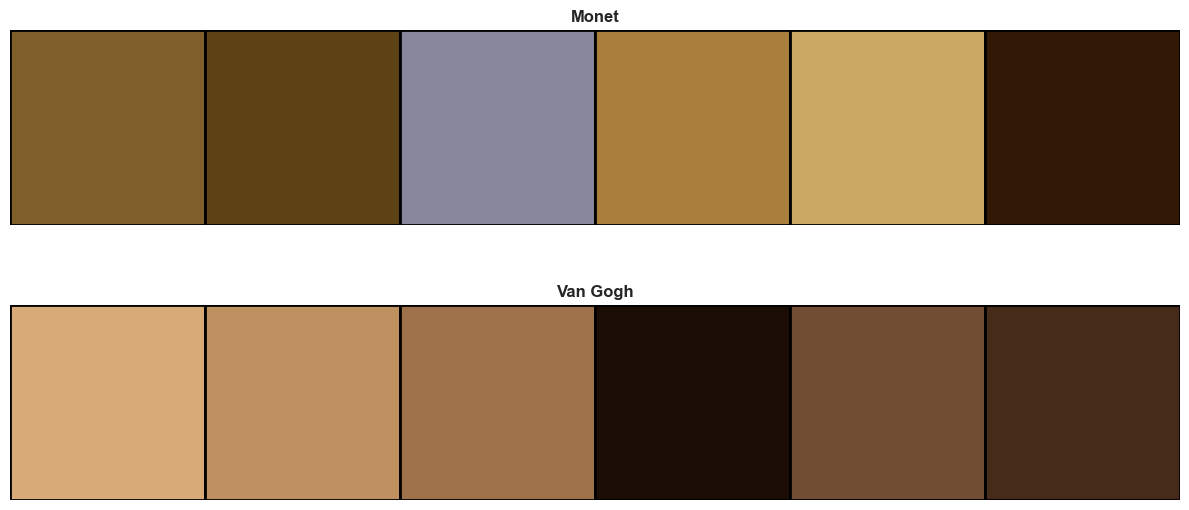

In [2]:
# Extract works
monet = analyzer.extract_artist_works('claude-monet', limit=5)
vangogh = analyzer.extract_artist_works('vincent-van-gogh', limit=5)

# Extract palettes
monet_colors = extractor.extract_dominant_colors(monet[0]['image'], n_colors=6)
vangogh_colors = extractor.extract_dominant_colors(vangogh[0]['image'], n_colors=6)

# Compare visually
visualizer.compare_palettes(monet_colors, vangogh_colors, labels=('Monet', 'Van Gogh'))

## 3. Quantitative Comparison

In [3]:
comparison = color_analyzer.compare_palettes(monet_colors, vangogh_colors)
print("Monet Stats:")
print(f"  Saturation: {comparison['palette1_stats']['mean_saturation']:.1f}%")
print(f"  Brightness: {comparison['palette1_stats']['mean_value']:.1f}%")

print("\nVan Gogh Stats:")
print(f"  Saturation: {comparison['palette2_stats']['mean_saturation']:.1f}%")
print(f"  Brightness: {comparison['palette2_stats']['mean_value']:.1f}%")

print(f"\nDifferences:")
print(f"  Saturation diff: {comparison['saturation_diff']:.1f}%")
print(f"  Brightness diff: {comparison['brightness_diff']:.1f}%")

Monet Stats:
  Saturation: 60.4%
  Brightness: 52.4%

Van Gogh Stats:
  Saturation: 57.0%
  Brightness: 50.5%

Differences:
  Saturation diff: 3.4%
  Brightness diff: 1.8%


## 4. Color Diversity Analysis

In [4]:
monet_diversity = color_analyzer.calculate_color_diversity(monet_colors)
vangogh_diversity = color_analyzer.calculate_color_diversity(vangogh_colors)

print(f"Monet color diversity: {monet_diversity:.3f}")
print(f"Van Gogh color diversity: {vangogh_diversity:.3f}")

if vangogh_diversity > monet_diversity:
    print("\nVan Gogh uses a more diverse color palette")
else:
    print("\nMonet uses a more diverse color palette")

Monet color diversity: 0.349
Van Gogh color diversity: 0.256

Monet uses a more diverse color palette


## 5. Comprehensive Color Report

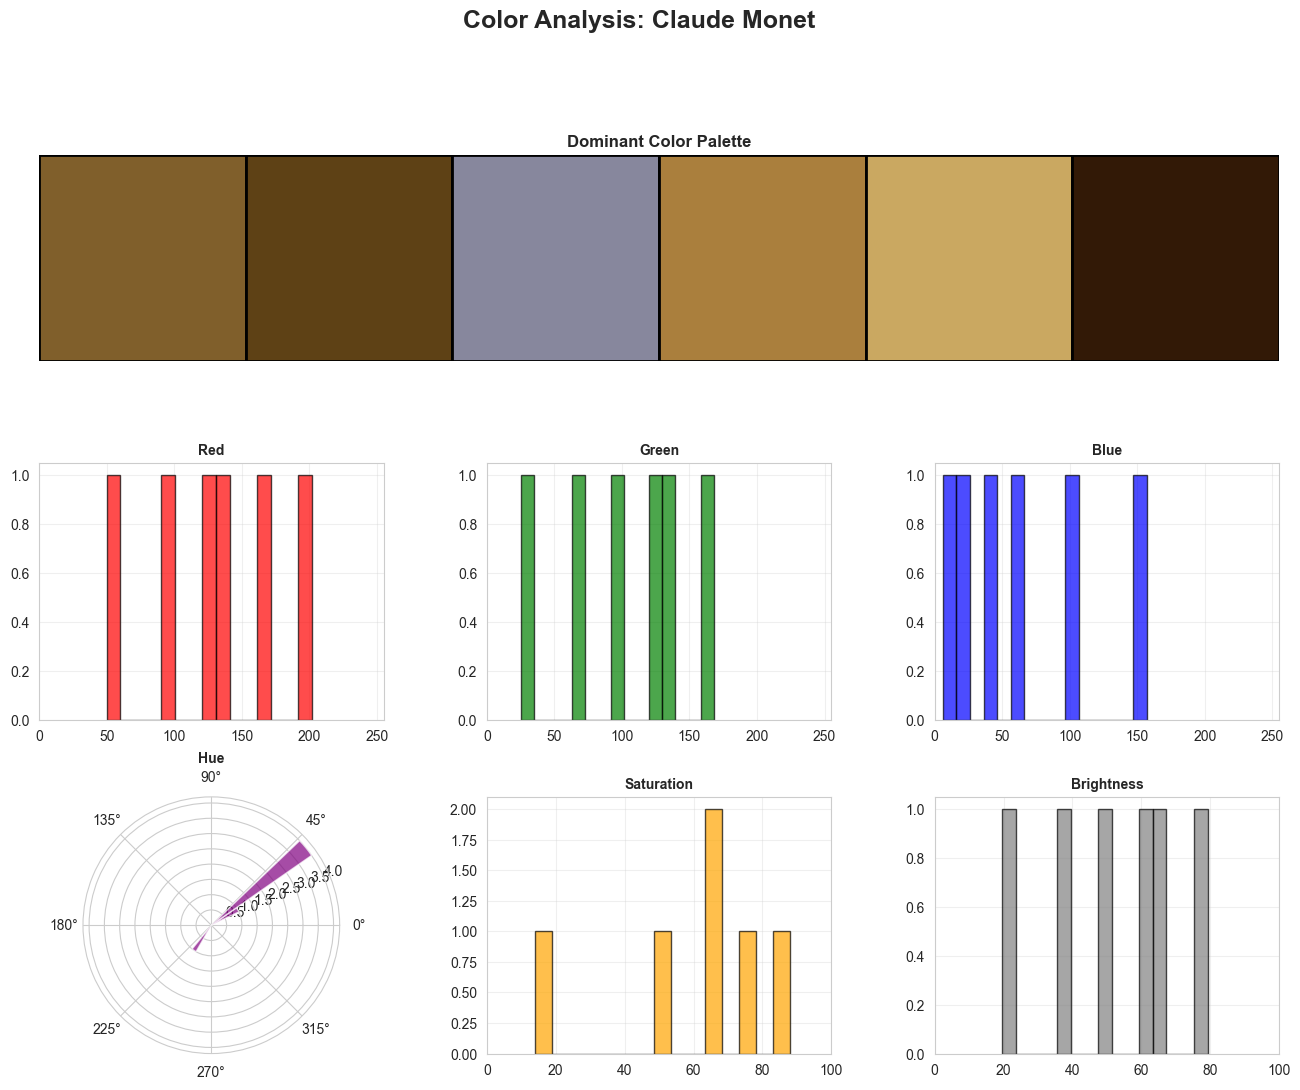

In [5]:
# Create detailed report for an artist
visualizer.create_artist_color_report(monet_colors, "Claude Monet")

## 6. Movement Comparison

Compare Impressionism vs. Expressionism

In [6]:
impressionists = ['claude-monet', 'pierre-auguste-renoir']
expressionists = ['edvard-munch', 'ernst-ludwig-kirchner']

def analyze_movement(artists):
    all_colors = []
    for artist in artists:
        works = analyzer.extract_artist_works(artist, limit=3)
        for work in works:
            colors = extractor.extract_dominant_colors(work['image'], n_colors=5)
            all_colors.extend(colors)
    return color_analyzer.analyze_palette_statistics(all_colors)

imp_stats = analyze_movement(impressionists)
exp_stats = analyze_movement(expressionists)

print("Impressionism:")
print(f"  Saturation: {imp_stats['mean_saturation']:.1f}%")
print(f"  Brightness: {imp_stats['mean_value']:.1f}%")

print("\nExpressionism:")
print(f"  Saturation: {exp_stats['mean_saturation']:.1f}%")
print(f"  Brightness: {exp_stats['mean_value']:.1f}%")

✓ Found 3 works by claude-monet
✓ Found 3 works by pierre-auguste-renoir
✓ Found 3 works by edvard-munch
✓ Found 3 works by ernst-ludwig-kirchner
Impressionism:
  Saturation: 34.6%
  Brightness: 55.0%

Expressionism:
  Saturation: 26.2%
  Brightness: 64.8%
